# Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tratamento dos dados

In [2]:
csv_falsos = pd.read_csv('Fake.csv')

In [3]:
csv_verdadeiros = pd.read_csv('True.csv')

## Tratamento dos dados de True.csv

In [4]:
csv_falsos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


não tem valores ausentes então não precisamos tratar valores ausentes, são todos no formato de objeto, a coluna de date deveria ser em datetime mas como não vamos trabalhar com essa coluna não vou alterar isso

In [5]:
csv_falsos.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


daqui a gente tira que existe notícias com titulos ou textos repetidos então vou remover elas e a gente tem apenas 6 assuntos diferentes o que eu não sei se pode ser um problema

In [6]:
csv_falsos.duplicated().sum()
csv_falsos[csv_falsos.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [7]:
csv_falsos = csv_falsos.drop_duplicates()

duplicadas removidas

## Tratamento dos dados de Fake.csv

In [8]:
csv_verdadeiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
csv_verdadeiros.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


igual do fake.csv os titulos se repetem o que é de certa forma normal por ser notícia mas acho que pode causar overfitting no algoritmo então vou remover esses que se repetem, e não sei se o fato de só ter 2 assuntos diferentes também pode afetar em algo

In [10]:
csv_verdadeiros.duplicated().sum()
csv_verdadeiros[csv_verdadeiros.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [11]:
csv_verdadeiros = csv_verdadeiros.drop_duplicates()

In [12]:
csv_verdadeiros = csv_verdadeiros.drop_duplicates(subset=['title', 'text'], keep='first')
# aqui eu to removendo duplicadas que tem titulo E texto igual e mantendo apenas a primeira

In [13]:
csv_verdadeiros.describe()

,title,text,subject,date
count,21197,21197,21197,21197
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,BEIRUT (Reuters) - The battle for the city of ...,politicsNews,"December 6, 2017"
freq,14,2,11217,166


In [14]:
csv_verdadeiros = csv_verdadeiros.drop_duplicates(subset=['title'], keep='first')
# aqui eu to removendo apenas as que tem titulo repetido e mantendo a primeira que aparece

In [15]:
csv_verdadeiros.describe()

,title,text,subject,date
count,20826,20826,20826,20826
unique,20826,20821,2,716
top,Indonesia to buy $1.14 billion worth of Russia...,BEIRUT (Reuters) - The battle for the city of ...,politicsNews,"December 6, 2017"
freq,1,2,11150,165


# Pré-processamento de Texto

## Importação de Bibliotecas

In [16]:
import re
#esse aq é o natural language tool kit que a gente vai usar pra remover as stopwords
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#baixando as stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/larissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# aqui a gente ta deixando os textos em formatos padroes

def limpar_texto(texto):
    texto = texto.lower()  # tudo em minúsculo
    texto = re.sub(r'\d+', '', texto)  # remove números
    texto = re.sub(r'[^\w\s]', '', texto)  # remove pontuação
    texto = texto.strip()  # remove espaços antes e depois
    return texto

#aplicando a limpeza nos datasets
csv_falsos['text_limpo'] = csv_falsos['text'].apply(limpar_texto)
csv_verdadeiros['text_limpo'] = csv_verdadeiros['text'].apply(limpar_texto)

* Adicionamos o rótulo 0 para notícias falsas e 1 para notícias verdadeiras *

In [19]:
csv_falsos['label'] = 0
csv_verdadeiros['label'] = 1

* agora a gente junta os dois em um unico dataset *

In [20]:
noticias = pd.concat([csv_falsos, csv_verdadeiros], ignore_index=True)

In [21]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44304 entries, 0 to 44303
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44304 non-null  object
 1   text        44304 non-null  object
 2   subject     44304 non-null  object
 3   date        44304 non-null  object
 4   text_limpo  44304 non-null  object
 5   label       44304 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.0+ MB


* removendo as stopwords *

In [22]:
stop_words = set(stopwords.words('english'))

def remover_stopwords(texto):
    palavras = texto.split()
    palavras_filtradas = [p for p in palavras if p not in stop_words]
    return ' '.join(palavras_filtradas)

noticias['text_limpo'] = noticias['text_limpo'].apply(remover_stopwords)

## Vetorização dos textos com TF-IDF

aq a gente ta criando um vetorizador TF-IDF que transforma o texto em uma matriz numérica baseada na importancia das palavras, ele calcula essa importância com base na frequência de cada palavra mas se ela aparece em muitos documentos ela deixa de ser importante (nao sei se deu pra entender)

In [23]:
vetorizado = TfidfVectorizer(max_features=5000)  # aqui eu to falando pra ele considerar apenas as 5000 mais importantes
X = vetorizado.fit_transform(noticias['text_limpo'])  
y = noticias['label']

## Separação dos dados em treino e teste

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # aqui eu deixei 20% para treino e 80% para teste

# Algoritmo de PLN

## Algoritmo 1 - Naive Bayes

esses resultados indicam que o modelo Naive Bayes teve um excelente desempenho na tarefa de classificação de notícias falsas e verdadeiras. A acurácia geral do modelo foi de 94%, ou seja, ele acertou corretamente a classificação em 94% das notícias do conjunto de teste (8861 exemplos no total).

Analisando por classe:

para as notícias falsas (classe 0), o modelo teve 94% de precisão (ou seja, das notícias que ele previu como falsas, 94% realmente eram falsas) e 94% de recall (ou seja, ele conseguiu encontrar 94% de todas as falsas existentes no teste).
para as notícias verdadeiras (classe 1), a precisão foi de 93% e o recall também de 94%, indicando um desempenho equilibrado entre os dois tipos de notícia.
além disso, os valores de f1-score (média harmônica entre precisão e recall) ficaram em 0.94 para ambas as classes, mostrando que o modelo mantém um bom equilíbrio entre não perder exemplos nem gerar muitos falsos positivos.


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [27]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Resultados - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Resultados - Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4696
           1       0.93      0.94      0.93      4165

    accuracy                           0.94      8861
   macro avg       0.94      0.94      0.94      8861
weighted avg       0.94      0.94      0.94      8861



## Algoritmo 2 - Random Forest


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=1, random_state=42, max_depth=10) #aqui eu coloquei pro modelo fazer so uma arvore e altura maxima de 10 mas ja deu um resultado mt bom pqp
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Resultados - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Resultados - Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4696
           1       0.83      0.85      0.84      4165

    accuracy                           0.85      8861
   macro avg       0.85      0.85      0.85      8861
weighted avg       0.85      0.85      0.85      8861



# Outros Algoritmos

## Algoritmo 3 - Logistic Regression
esse aqui o gepeto disse que vai muito bem com tf-idf+texto

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(max_iter=3) # com 3 iteraçoes ja deu acuracia boa
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4696
           1       0.97      0.82      0.89      4165

    accuracy                           0.91      8861
   macro avg       0.92      0.90      0.90      8861
weighted avg       0.91      0.91      0.90      8861



/opt/anaconda3/envs/trabalhodeia/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Algoritmo 4 - SVM

In [32]:
from sklearn.svm import LinearSVC

In [33]:
svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       0.99      1.00      1.00      4165

    accuracy                           1.00      8861
   macro avg       1.00      1.00      1.00      8861
weighted avg       1.00      1.00      1.00      8861



acurácia deu 1 pqp

## Algoritmo 5 - KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.98      0.77      4696
           1       0.95      0.37      0.53      4165

    accuracy                           0.69      8861
   macro avg       0.79      0.68      0.65      8861
weighted avg       0.78      0.69      0.66      8861



# Matriz de Confusão para cada algoritmo

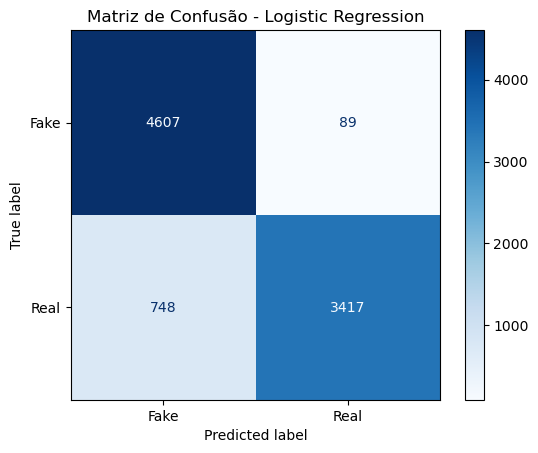

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Fake", "Real"])
disp_lr.plot(cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

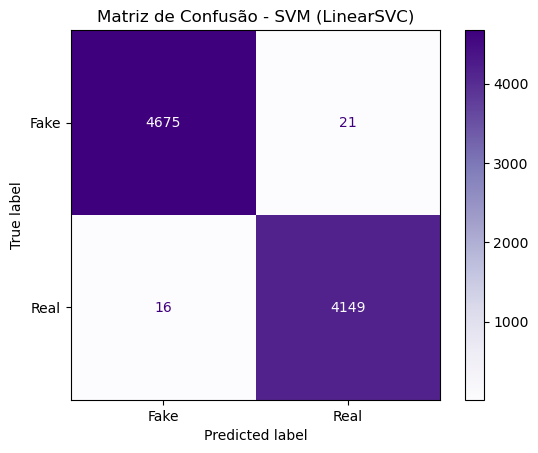

In [37]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Fake", "Real"])
disp_svm.plot(cmap='Purples')
plt.title("Matriz de Confusão - SVM (LinearSVC)")
plt.show()

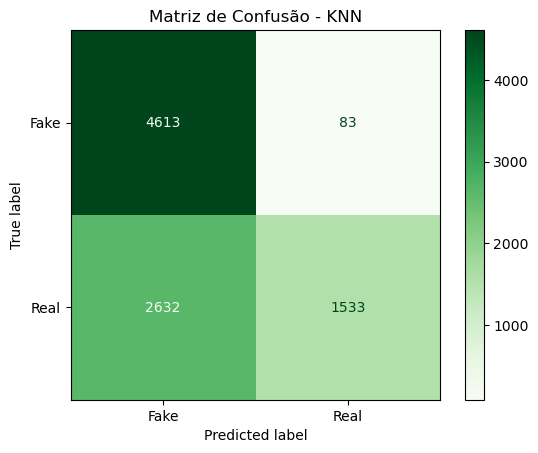

In [38]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Fake", "Real"])
disp_knn.plot(cmap='Greens')
plt.title("Matriz de Confusão - KNN")
plt.show()

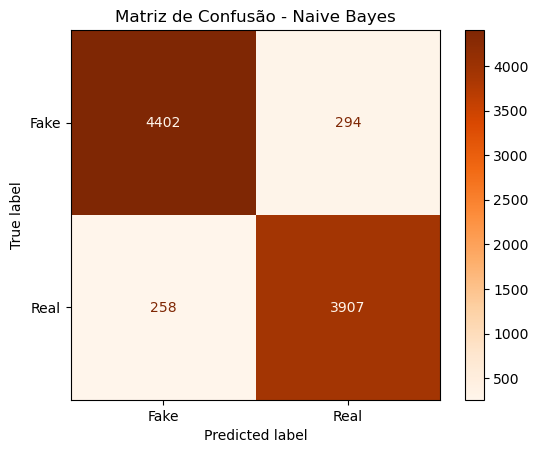

In [39]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Fake", "Real"])
disp_nb.plot(cmap='Oranges')
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

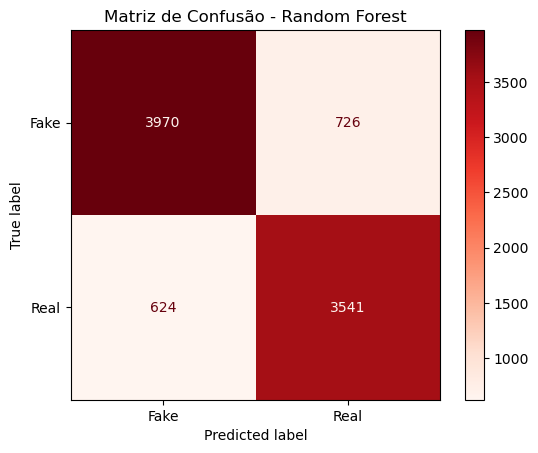

In [40]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Fake", "Real"])
disp_rf.plot(cmap='Reds')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Gráficos

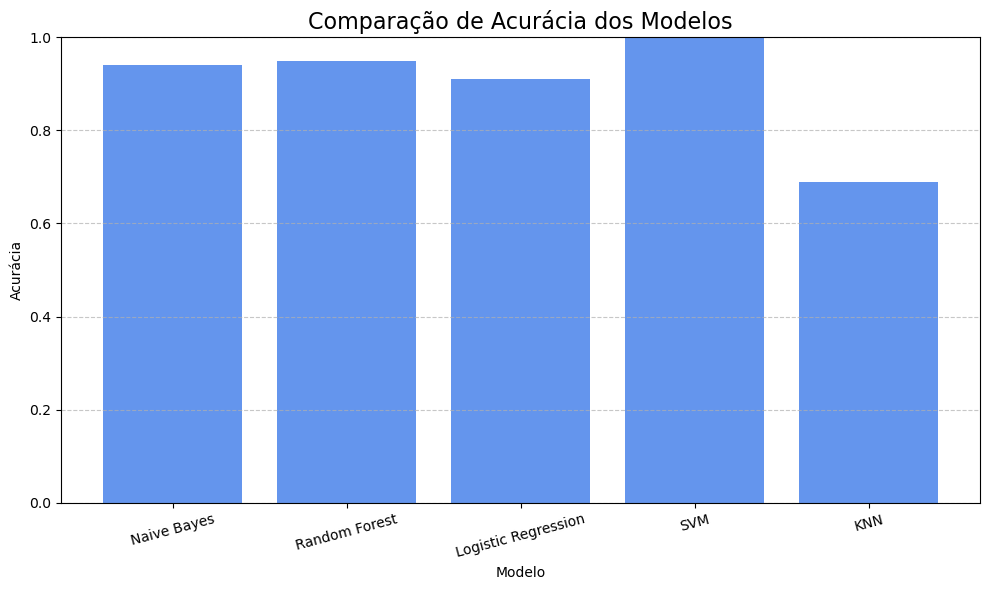

In [47]:
modelos = ["Naive Bayes", "Random Forest", "Logistic Regression", "SVM", "KNN"]
acuracias = [0.94, 0.95, 0.91, 1.00, 0.69]

plt.figure(figsize=(10, 6))
plt.bar(modelos, acuracias, color='cornflowerblue')
plt.ylim(0, 1.0)
plt.title("Comparação de Acurácia dos Modelos", fontsize=16)
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()